In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import tensorflow as tf
# Import data
mnist = input_data.read_data_sets('./data', one_hot=True)

print()
print("Image Shape: {}".format(mnist.train.images[0].shape))
print("Label Shape: {}".format(mnist.train.labels[0].shape))
print()
print("Training Set:   {} samples".format(len(mnist.train.images)))
print("Test Set:       {} samples".format(len(mnist.test.images)))


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting ./data\train-images-idx3-ubyte.gz
Extracting ./data\train-labels-idx1-ubyte.gz
Extracting ./data\t10k-images-idx3-ubyte.gz
Extracting ./data\t10k-labels-idx1-ubyte.gz

Image Shape: (784,)
Label Shape: (10,)

Training Set:   55000 samples
Test Set:       10000 samples


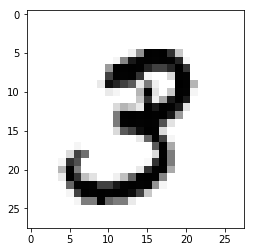

In [2]:
img1 = mnist.train.images[1:2].reshape(28,28)
plt.imshow(img1,cmap='Greys',interpolation='nearest')
plt.show()

In [3]:
class Model:
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()
        
    
    def _build_net(self):

        with tf.variable_scope(self.name):
            self.training = tf.placeholder(tf.bool)
    
            self.X = tf.placeholder(tf.float32,[None,784])
            X_image = tf.reshape(self.X,[-1,28,28,1])
            self.Y = tf.placeholder(tf.float32,[None,10])

            conv1 = tf.contrib.layers.conv2d(
                inputs=X_image,
                num_outputs=32,
                kernel_size=[3, 3],
                padding='SAME',
                activation_fn=tf.nn.relu)
            pool1 = tf.contrib.layers.max_pool2d(
                inputs=conv1,
                kernel_size=[2, 2],
                stride=2,
                padding = 'SAME')
            dropout1 = tf.layers.dropout(
                inputs=pool1,
                rate=0.7,
                training=self.training)

            conv2 = tf.contrib.layers.conv2d(
                inputs=dropout1,
                num_outputs=64,
                kernel_size=[3, 3],
                padding='SAME',
                activation_fn=tf.nn.relu)
            pool2 = tf.contrib.layers.max_pool2d(
                inputs=conv2,
                kernel_size=[2, 2],
                stride=2,
                padding = 'SAME')
            dropout2 = tf.layers.dropout(
                inputs=pool2,
                rate=0.7,
                training=self.training)

            conv3 = tf.contrib.layers.conv2d(
                inputs=dropout2,
                num_outputs=128,
                kernel_size=[3, 3],
                padding='SAME',
                activation_fn=tf.nn.relu)
            pool3 = tf.contrib.layers.max_pool2d(
                inputs=conv3,
                kernel_size=[2, 2],
                stride=2,
                padding = 'SAME')
            dropout3 = tf.layers.dropout(
                inputs=pool3,
                rate=0.7,
                training=self.training)
    
            fc1 = tf.contrib.layers.flatten(dropout2)
            fc2 = tf.contrib.layers.fully_connected(fc1, 120, activation_fn=tf.nn.relu)
            fc3 = tf.contrib.layers.fully_connected(fc2, 84, activation_fn=tf.nn.relu)
            self.mu = tf.contrib.layers.linear(fc3, 10)

        self.Cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.Y, logits=self.mu))
        self.Optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(self.Cost)

        Correct_prediction = tf.equal(tf.argmax(self.mu, 1), tf.argmax(self.Y, 1))
        self.Accuracy = tf.reduce_mean(tf.cast(Correct_prediction, tf.float32))
    
    def Predict(self, x_test, training=False):
        return self.sess.run(self.mu, feed_dict={self.X: x_test, self.training:training})
    
    def Get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.Accuracy, feed_dict={self.X:x_test, self.Y:y_test, self.training:training})
    
    def Train(self, x_data, y_data, training=True):
        return self.sess.run([self.Cost, self.Optimizer], feed_dict={self.X:x_data, self.Y:y_data, self.training:training})
    


In [4]:

# hyperparameters
n_epoch = 20
batch_size = 100
learning_rate = 0.001 #0.01

# define placeholders
sess = tf.Session()

models = []
num_models = 7
for i in range(num_models):
    models.append(Model(sess, "gaza"+str(i)))

sess.run(tf.global_variables_initializer())


In [5]:
print("학습시작")
import numpy as np

for epoch in range(n_epoch):
    avg_cost_vec = np.zeros(len(models)) 
    total_batch = int(mnist.train.num_examples/batch_size)
    for _ in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        for md_idx, md in enumerate(models):
            cost, _ = md.Train(batch_x, batch_y)
            avg_cost_vec[md_idx] += cost / total_batch
    
    print('Epoch:', '%04d' % (epoch+1), 'cost = ', avg_cost_vec)
    
print('학습종료')


학습시작
Epoch: 0001 cost =  [0.47343591 0.47330313 0.48105491 0.45465937 0.48387315 0.45716732
 0.45582562]
Epoch: 0002 cost =  [0.18478342 0.18323487 0.18309482 0.17680675 0.18568463 0.17751798
 0.17285296]
Epoch: 0003 cost =  [0.14001499 0.14252329 0.14005258 0.14079017 0.1431448  0.13773354
 0.13825888]
Epoch: 0004 cost =  [0.12119656 0.11774824 0.12024196 0.1192769  0.12249329 0.11529281
 0.11991533]
Epoch: 0005 cost =  [0.10791601 0.10517151 0.10725455 0.10635123 0.10665033 0.10358183
 0.1030054 ]
Epoch: 0006 cost =  [0.09724555 0.0959434  0.09504034 0.09475485 0.09594084 0.09255151
 0.09569754]
Epoch: 0007 cost =  [0.09025606 0.08860253 0.08987523 0.08933696 0.09246346 0.0907983
 0.08732651]
Epoch: 0008 cost =  [0.08657131 0.08422594 0.08464751 0.08248152 0.08592326 0.083694
 0.08219948]
Epoch: 0009 cost =  [0.07918278 0.07877359 0.08106496 0.08209275 0.08080158 0.07748893
 0.08074269]
Epoch: 0010 cost =  [0.07375187 0.07712065 0.07515887 0.0756071  0.07736159 0.07335648
 0.07622587

In [6]:
test_size = len(mnist.test.labels)
predictions = np.zeros([test_size, 10])
for md_idx, md in enumerate(models):
    print(md_idx, 'Accuracy:', md.Get_accuracy(mnist.test.images, mnist.test.labels))
    p = md.Predict(mnist.test.images)
    predictions += p
    

0 Accuracy: 0.9921
1 Accuracy: 0.9906
2 Accuracy: 0.9931
3 Accuracy: 0.9906
4 Accuracy: 0.9925
5 Accuracy: 0.9924
6 Accuracy: 0.9923


In [7]:
Ensemble_correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
Ensemble_accuracy = tf.reduce_mean(tf.cast(Ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy:', sess.run(Ensemble_accuracy))


Ensemble accuracy: 0.9932


In [8]:
writer = tf.summary.FileWriter('./graphs_model', tf.get_default_graph())
## 새로운 DOS command 창에서
# activate tensorflow
# tensorboard --logdir="./graphs_model" --port 6006
# 브라우저: http://Com-PC:6006   (컴퓨터마다 다름, 화면에 나온 값 참조)
# graphs 확인

In [9]:
writer.close()